##Neural Network From Scratch

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/train.csv')

In [ ]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.shape

(7453, 785)

In [ ]:
#array aki mattum
data = np.array(data)
m,n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [ ]:
Y_train

array([4., 3., 7., ..., 4., 9., 5.])

In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    Y = Y.astype(int)  # Convert Y to integer type
    num_classes = Y.max() + 1
    one_hot_Y = np.zeros((Y.size, num_classes))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [1]:
import tensorflow as tf
tf.__version__

'2.14.0'

In [6]:
mnist = tf.keras.datasets.mnist#28 * 28 images of hand-written digits 0-9

(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
import matplotlib.pyplot as plt

print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

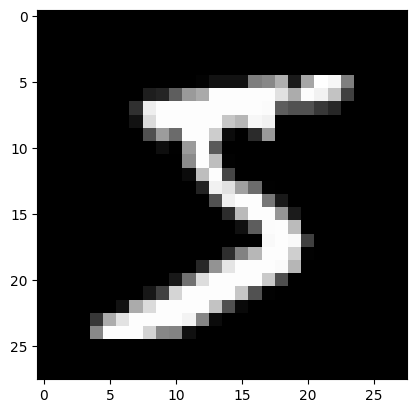

In [9]:
plt.imshow(x_train[0], cmap='gray')
plt.show()

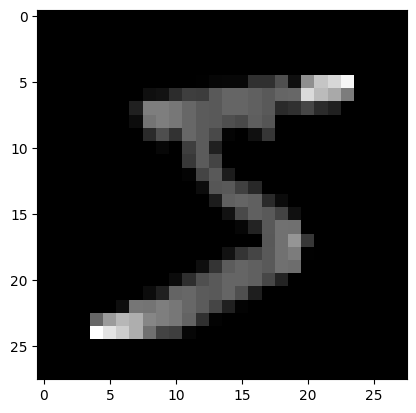

In [10]:
#normalise cheiyan pokuva
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [11]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [15]:
#architucture of our model
model = tf.keras.models.Sequential()
#multi-dimenion anu, so we neeed to flatern it
#convolution neural n/w ankil, last densly connected akum, so flatten it
model.add(tf.keras.layers.Flatten())
#parameter
#-128-how many units in the layer, activation fn
# Layer 1
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
# Layer 2
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
#o/p layer  (with 10 units for 10 classes)
#probabality distribution fn anu so, - softmax
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
#loss is the degree of error, which you got wrong
#always try to mininmise loss
# Compiling the model
# model.complie(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Assuming x_train and y_train are your training data and labels
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 12s 5ms/step - loss: 0.2695 - accuracy: 0.9206
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1096 - accuracy: 0.9663
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0731 - accuracy: 0.9766


In [16]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss,val_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0936 - accuracy: 0.9709
0.09355956315994263 0.9708999991416931


In [17]:
#save the model
model.save('epic_num_reader.model')

In [18]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [19]:
#prediction always takes as a list
predictions = new_model.predict([x_test])
print(predictions)
#these all are probability distribution

313/313 [==============================] - 2s 5ms/step
[[5.2482187e-09 8.6995541e-08 2.0175621e-06 ... 9.9999338e-01
  7.9789091e-09 1.4232206e-06]
 [3.8900116e-10 5.8683286e-06 9.9999398e-01 ... 6.4759864e-11
  3.0043096e-11 8.0547607e-15]
 [3.8379292e-07 9.9989814e-01 1.5886088e-05 ... 6.2630616e-06
  6.5317113e-06 1.2902207e-06]
 ...
 [4.2668615e-09 2.8841100e-08 2.7797810e-08 ... 2.5972013e-06
  3.1870243e-07 1.1409723e-04]
 [2.1735485e-05 1.5824864e-05 4.1324242e-06 ... 3.2761234e-06
  1.4009407e-03 2.9649287e-08]
 [1.3278483e-07 9.1031758e-08 8.3201871e-07 ... 9.8135606e-12
  8.1082774e-08 1.2698971e-10]]


In [20]:
import numpy as np

print(np.argmax(predictions[0]))

7


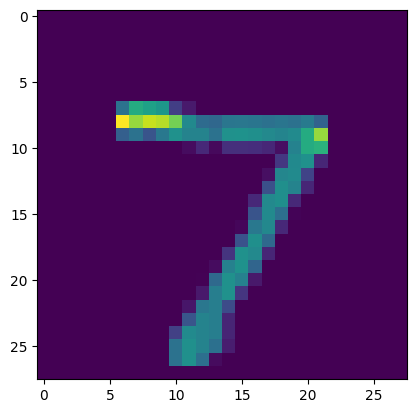

In [22]:
plt.imshow(x_test[0])
plt.show()